In [1]:
import pandas as pd


#read and parse the .csv features file for A1-turbine normalized data
df = pd.read_csv('Normalized Data/A1-turbine_normalized.txt', delimiter = '\t')
df.head()


,#height_over_sea_level,fall,net_fall,flow,power_of_hydroelectrical_turbine
0,0.8462,0.8212,0.8488,0.0833,0.1500
1,0.9487,0.9226,0.9468,0.0833,0.1627
2,0.2821,0.2803,0.2764,0.5833,0.3712
3,0.2051,0.2042,0.2028,0.5833,0.3304
4,1.0000,0.9614,0.9413,0.8333,0.8948


In [2]:
columns = df.shape[1]

# construct an array of arrays size (451, 4) for all features input values
inputcolumns = df.columns[0 : 4]
features = df[inputcolumns].values

# construct an array of size (451) for all features target values
outputcolumn = df.columns[4]
targets = df[outputcolumn].values

print(features.shape)
print(targets.shape)

(451, 4)
(451,)


In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size = 0.15, random_state= 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(383, 4)
(68, 4)
(383,)
(68,)


In [7]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train, y_train)
score = reg.score(x_train, y_train)
print(score)

y_pred_test = reg.predict(x_test)
y_pred_train = reg.predict(x_train)
#print(y_pred_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("R2 score: ", r2_score(y_test, y_pred_test))
print("MSE: ", mean_squared_error(y_test, y_pred_test))
print("MAE: ", mean_absolute_error(y_test, y_pred_test))

print("R2 score: ", r2_score(y_train, y_pred_train))
print("MSE: ", mean_squared_error(y_train, y_pred_train))
print("MAE: ", mean_absolute_error(y_train, y_pred_train))

0.9730547067948092
R2 score:  0.9694377472778436
MSE:  0.0017224217079641476
MAE:  0.027046650065034858
R2 score:  0.9730547067948092
MSE:  0.001701367327808995
MAE:  0.03212196088329469


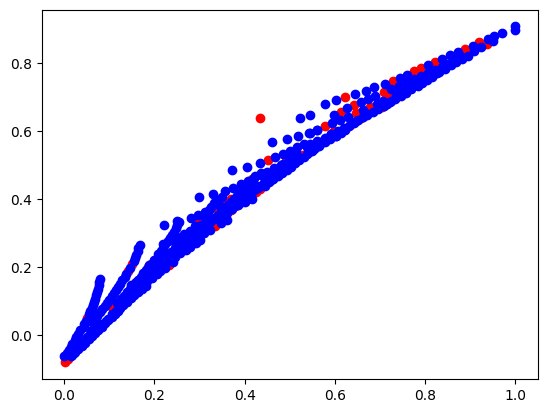

In [8]:
# scatterplot of predicted vs actual values
from matplotlib import pyplot as plt
plt.scatter(y_test, y_pred_test, color = 'red')
plt.scatter(y_train, y_pred_train, color = 'blue')